# 1. Load Data
------

In [58]:
!pip install kagglehub[pandas-datasets]
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [59]:
import kagglehub
import os
# Store the path of the Kaggle dataset
path = kagglehub.dataset_download("jonassouza872/vitoria-da-conquista-weather-data-september")
# Check if the path is correct
print(path)

# List all files inside the downloaded folder
print(os.listdir(path))

Using Colab cache for faster access to the 'vitoria-da-conquista-weather-data-september' dataset.
/kaggle/input/vitoria-da-conquista-weather-data-september
['temp.csv']


In [60]:
import pandas as pd
df = pd.read_csv(f"{path}/temp.csv")  # Reads the declared path as a CSV file
df.head()  # Prints the first 5 rows of the dataset

,Timestamp,Temp_MPU6050_C,Temp_AHT20_C,Umid_AHT20_pct,Temp_BMP280_C,Press_BMP280_hPa,Temp_BMP180_C,Press_BMP180_hPa,Temp_DS18B20_C,Temp_NTC_C,Temp_DHT11_C,Umid_DHT11_pct
0,2025-08-31 22:31:02,20.86,19.90,73.37,21.28,921.24,20.19,923.02,25.69,22.26,20.03,66.0
1,2025-08-31 22:31:33,21.75,19.97,75.57,21.48,921.12,20.27,923.04,23.81,20.73,20.02,66.0
2,2025-08-31 22:32:05,21.80,19.75,74.31,21.25,921.20,20.16,923.06,22.50,20.88,20.02,67.0
3,2025-08-31 22:32:36,21.57,19.55,74.77,21.07,921.15,20.06,922.99,21.31,20.62,20.01,66.0
4,2025-08-31 22:33:07,21.66,19.60,75.09,21.12,921.25,20.06,923.02,21.88,20.95,20.00,66.0


In [61]:
df.columns #all columns

Index(['Timestamp', 'Temp_MPU6050_C', 'Temp_AHT20_C', 'Umid_AHT20_pct',
       'Temp_BMP280_C', 'Press_BMP280_hPa', 'Temp_BMP180_C',
       'Press_BMP180_hPa', 'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C',
       'Umid_DHT11_pct'],
      dtype='object')

# 2. Loading Validation Data

-----------

- The validation data were obtained from the database of the National Institute of Meteorology of Brazil (INMET), a national agency, through the link https://tempo.inmet.gov.br/TabelaEstacoes/A001, covering the period from September 1st to September 30th, 2025.


In [62]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [63]:
import pandas as pd
df_validation = pd.read_csv('/content/dados_validacao-csv (1).csv',
                            sep=';',
                            encoding='latin1',
                            on_bad_lines='skip')

df_validation.head() # Display the first 5 rows of the validation dataset

,"ï»¿""Data""",Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
0,01/09/2025,0,"17,9","18,1","17,8","96,0","96,0","96,0","17,2","17,4","17,1","923,3","923,3","922,7","2,7","78,0","7,6",NaN,"0,0"
1,01/09/2025,100,"17,8","17,9","17,6","95,0","96,0","95,0","17,0","17,2","16,8","923,4","923,4","923,2","2,1","98,0","6,4",NaN,"0,0"
2,01/09/2025,200,"17,1","17,8","16,9","100,0","100,0","95,0","17,1","17,1","16,9","923,9","923,9","923,4","1,8","88,0","6,3",NaN,"0,0"
3,01/09/2025,300,"17,0","17,1","16,9",NaN,"100,0","100,0",NaN,"17,1","16,9","923,6","923,9","923,6","2,2","92,0","5,5",NaN,"0,0"
4,01/09/2025,400,"16,4","17,0","16,4","100,0","100,0","100,0","16,4","17,0","16,4","923,1","923,6","923,1","2,2","101,0","5,4",NaN,"0,0"


- Correct the time, it shows 1000 → 10:00.

In [64]:
df_validation_clean = df_validation.dropna() #Remove rows with ANY NaN values
df_validation = df_validation_clean
df_validation #Clean data

,"ï»¿""Data""",Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
10,01/09/2025,1000,"16,2","16,2","15,7","100,0","100,0","100,0","16,1","16,2","15,7","923,2","923,3","922,7","1,7","111,0","5,2","80,30","0,0"
11,01/09/2025,1100,"17,1","18,1","16,2","93,0","100,0","90,0","15,9","16,6","15,8","924,2","924,2","923,2","3,9","131,0","7,2","760,70","0,0"
12,01/09/2025,1200,"18,3","19,0","17,0","85,0","95,0","85,0","15,8","16,6","15,7","924,9","924,9","924,2","3,5","113,0","7,3","1128,20","0,0"
13,01/09/2025,1300,"19,3","19,9","18,3","79,0","86,0","78,0","15,6","16,6","15,3","925,0","925,1","924,8","3,2","111,0","10,1","1536,20","0,0"
14,01/09/2025,1400,"20,8","21,0","19,3","72,0","79,0","70,0","15,5","16,6","15,1","924,6","925,1","924,5","4,0","111,0","9,3","1724,10","0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,30/09/2025,1700,"25,4","26,6","24,4","44,0","47,0","43,0","12,1","13,2","11,8","919,6","920,6","919,6","3,4","95,0","9,7","4265,70","0,0"
714,30/09/2025,1800,"25,6","26,3","25,0","44,0","46,0","41,0","12,4","13,0","11,7","918,9","919,6","918,9","3,3","109,0","9,8","3657,40","0,0"
715,30/09/2025,1900,"25,4","25,9","25,0","44,0","45,0","43,0","12,3","12,8","11,9","919,0","919,0","918,8","3,1","112,0","9,3","2720,50","0,0"
716,30/09/2025,2000,"24,0","25,7","24,0","44,0","46,0","43,0","11,1","12,7","11,1","919,4","919,4","919,0","3,8","116,0","10,0","1573,90","0,0"


- Corrigir o horario, está 1000 -> 10 horas.

In [65]:
df_validation['Hora (UTC)'] = df_validation['Hora (UTC)'].astype(str).str.zfill(4)  # Ensure 4 digits (e.g., 1000)
df_validation['Hora (UTC)'] = df_validation['Hora (UTC)'].str[:2] + ':' + df_validation[time_column].str[2:]  #Split into HH:MM
df_validation.head()

,"ï»¿""Data""",Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
10,01/09/2025,10:00,"16,2","16,2","15,7","100,0","100,0","100,0","16,1","16,2","15,7","923,2","923,3","922,7","1,7","111,0","5,2","80,30","0,0"
11,01/09/2025,11:00,"17,1","18,1","16,2","93,0","100,0","90,0","15,9","16,6","15,8","924,2","924,2","923,2","3,9","131,0","7,2","760,70","0,0"
12,01/09/2025,12:00,"18,3","19,0","17,0","85,0","95,0","85,0","15,8","16,6","15,7","924,9","924,9","924,2","3,5","113,0","7,3","1128,20","0,0"
13,01/09/2025,13:00,"19,3","19,9","18,3","79,0","86,0","78,0","15,6","16,6","15,3","925,0","925,1","924,8","3,2","111,0","10,1","1536,20","0,0"
14,01/09/2025,14:00,"20,8","21,0","19,3","72,0","79,0","70,0","15,5","16,6","15,1","924,6","925,1","924,5","4,0","111,0","9,3","1724,10","0,0"


Now, we will need to generate a new file with the time in Brasília Time (BRT), since our project analysis data is in BRT, and also convert it to a timestamp.

In [66]:
# Convert to Timestamp (adjust column names based on output above)
df_validation['Timestamp'] = pd.to_datetime(df_validation['ï»¿"Data"'] + ' ' + df_validation['Hora (UTC)'], format='%d/%m/%Y %H:%M')
df_validation.set_index('Timestamp', inplace=True) # Create new Timestamp column
df_validation.head()

,"ï»¿""Data""",Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
Timestamp,,,,,,,,,,,,,,,,,,,
2025-09-01 10:00:00,01/09/2025,10:00,"16,2","16,2","15,7","100,0","100,0","100,0","16,1","16,2","15,7","923,2","923,3","922,7","1,7","111,0","5,2","80,30","0,0"
2025-09-01 11:00:00,01/09/2025,11:00,"17,1","18,1","16,2","93,0","100,0","90,0","15,9","16,6","15,8","924,2","924,2","923,2","3,9","131,0","7,2","760,70","0,0"
2025-09-01 12:00:00,01/09/2025,12:00,"18,3","19,0","17,0","85,0","95,0","85,0","15,8","16,6","15,7","924,9","924,9","924,2","3,5","113,0","7,3","1128,20","0,0"
2025-09-01 13:00:00,01/09/2025,13:00,"19,3","19,9","18,3","79,0","86,0","78,0","15,6","16,6","15,3","925,0","925,1","924,8","3,2","111,0","10,1","1536,20","0,0"
2025-09-01 14:00:00,01/09/2025,14:00,"20,8","21,0","19,3","72,0","79,0","70,0","15,5","16,6","15,1","924,6","925,1","924,5","4,0","111,0","9,3","1724,10","0,0"


In [67]:
# Drop date and time columns
df_validation = df_validation.drop(columns=['ï»¿"Data"', 'Hora (UTC)'])

df_validation.head()

,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
Timestamp,,,,,,,,,,,,,,,,,
2025-09-01 10:00:00,"16,2","16,2","15,7","100,0","100,0","100,0","16,1","16,2","15,7","923,2","923,3","922,7","1,7","111,0","5,2","80,30","0,0"
2025-09-01 11:00:00,"17,1","18,1","16,2","93,0","100,0","90,0","15,9","16,6","15,8","924,2","924,2","923,2","3,9","131,0","7,2","760,70","0,0"
2025-09-01 12:00:00,"18,3","19,0","17,0","85,0","95,0","85,0","15,8","16,6","15,7","924,9","924,9","924,2","3,5","113,0","7,3","1128,20","0,0"
2025-09-01 13:00:00,"19,3","19,9","18,3","79,0","86,0","78,0","15,6","16,6","15,3","925,0","925,1","924,8","3,2","111,0","10,1","1536,20","0,0"
2025-09-01 14:00:00,"20,8","21,0","19,3","72,0","79,0","70,0","15,5","16,6","15,1","924,6","925,1","924,5","4,0","111,0","9,3","1724,10","0,0"


- Convert UTC-BRT

In [68]:
# Convert from UTC to BRT by subtracting 3 hours
df_validation.index = df_validation.index - pd.Timedelta(hours=3)
df_validation.head()

,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/mÂ²),Chuva (mm)
Timestamp,,,,,,,,,,,,,,,,,
2025-09-01 07:00:00,"16,2","16,2","15,7","100,0","100,0","100,0","16,1","16,2","15,7","923,2","923,3","922,7","1,7","111,0","5,2","80,30","0,0"
2025-09-01 08:00:00,"17,1","18,1","16,2","93,0","100,0","90,0","15,9","16,6","15,8","924,2","924,2","923,2","3,9","131,0","7,2","760,70","0,0"
2025-09-01 09:00:00,"18,3","19,0","17,0","85,0","95,0","85,0","15,8","16,6","15,7","924,9","924,9","924,2","3,5","113,0","7,3","1128,20","0,0"
2025-09-01 10:00:00,"19,3","19,9","18,3","79,0","86,0","78,0","15,6","16,6","15,3","925,0","925,1","924,8","3,2","111,0","10,1","1536,20","0,0"
2025-09-01 11:00:00,"20,8","21,0","19,3","72,0","79,0","70,0","15,5","16,6","15,1","924,6","925,1","924,5","4,0","111,0","9,3","1724,10","0,0"


In [95]:
df_validation = df_validation.replace(',', '.', regex=True) #Convert , to .

- Now the dataset is 100% clean and ready to be used for project data validation.

In [96]:
df_validation.to_csv('validation_data_cleaned_BRT.csv')#Convert and save the cleaned validation data with BRT timestamp

from google.colab import files
files.download('validation_data_cleaned_BRT.csv')#Download the cleaned CSV file with BRT timestamp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
df_validation.shape # 331 rows of data
df_validation.columns

Index(['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)', 'Umi. Ins. (%)',
       'Umi. Max. (%)', 'Umi. Min. (%)', 'Pto Orvalho Ins. (C)',
       'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)', 'Pressao Ins. (hPa)',
       'Pressao Max. (hPa)', 'Pressao Min. (hPa)', 'Vel. Vento (m/s)',
       'Dir. Vento (m/s)', 'Raj. Vento (m/s)', 'Radiacao (KJ/mÂ²)',
       'Chuva (mm)'],
      dtype='object')

In [93]:
Temperature_ref = df_validation['Temp. Ins. (C)']  # stores temperature validation data
Humidity_ref = df_validation['Umi. Ins. (%)']  # humidity validation
Pressure_ref = df_validation['Pressao Ins. (hPa)']  # pressure validation


# 3. Adequar dados de validação e do projeto real.

---

- PROBLEMA: estamo com problema porque meu projeto real tem cerca de 80000 dados, enquanto o do instituto de metereologia tem cerca de 300 apos limparmos os dados inconsistentes tipo NAN

In [97]:
df.shape

(82430, 12)

In [98]:
df_validation.shape

(331, 17)

- Para resolver isso, irei pegar os dados do meu projeto que estejam no mesmo horario do dados do instituto nacional e jogarei dentro do df_validantion esses dados de cada sensor, para que assim a comparação seja justa no meskmo horario.

In [107]:
# Step 1: Prepare df (sensor data)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

In [108]:

# Step 2: Prepare df_validation (reference data)
df_validation = df_validation.reset_index()
df_validation = df_validation.rename(columns={'index': 'Timestamp'})
df_validation['Timestamp'] = pd.to_datetime(df_validation['Timestamp'])
df_validation = df_validation.sort_values('Timestamp')


In [109]:
# Step 3: Merge using nearest timestamp (tolerance = 30 seconds)
df_validation = pd.merge_asof(
    df_validation,
    df,
    on='Timestamp',
    direction='nearest',
    tolerance=pd.Timedelta('30s')
)

In [110]:
df_validation.head()

,Timestamp,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),...,Temp_AHT20_C,Umid_AHT20_pct,Temp_BMP280_C,Press_BMP280_hPa,Temp_BMP180_C,Press_BMP180_hPa,Temp_DS18B20_C,Temp_NTC_C,Temp_DHT11_C,Umid_DHT11_pct
0,2025-09-01 07:00:00,16.2,16.2,15.7,100.0,100.0,100.0,16.1,16.2,15.7,...,17.15,81.91,18.73,920.97,17.42,922.42,17.06,18.53,17.05,69.0
1,2025-09-01 08:00:00,17.1,18.1,16.2,93.0,100.0,90.0,15.9,16.6,15.8,...,18.03,77.72,19.62,922.07,18.16,923.27,17.94,19.65,18.03,65.0
2,2025-09-01 09:00:00,18.3,19.0,17.0,85.0,95.0,85.0,15.8,16.6,15.7,...,18.82,70.72,20.40,922.38,19.09,923.70,18.81,20.43,19.01,58.0
3,2025-09-01 10:00:00,19.3,19.9,18.3,79.0,86.0,78.0,15.6,16.6,15.3,...,20.20,66.27,21.76,922.37,20.45,923.63,20.13,21.57,20.05,55.0
4,2025-09-01 11:00:00,20.8,21.0,19.3,72.0,79.0,70.0,15.5,16.6,15.1,...,21.95,61.69,23.46,921.51,22.28,923.07,22.06,23.76,22.02,49.0


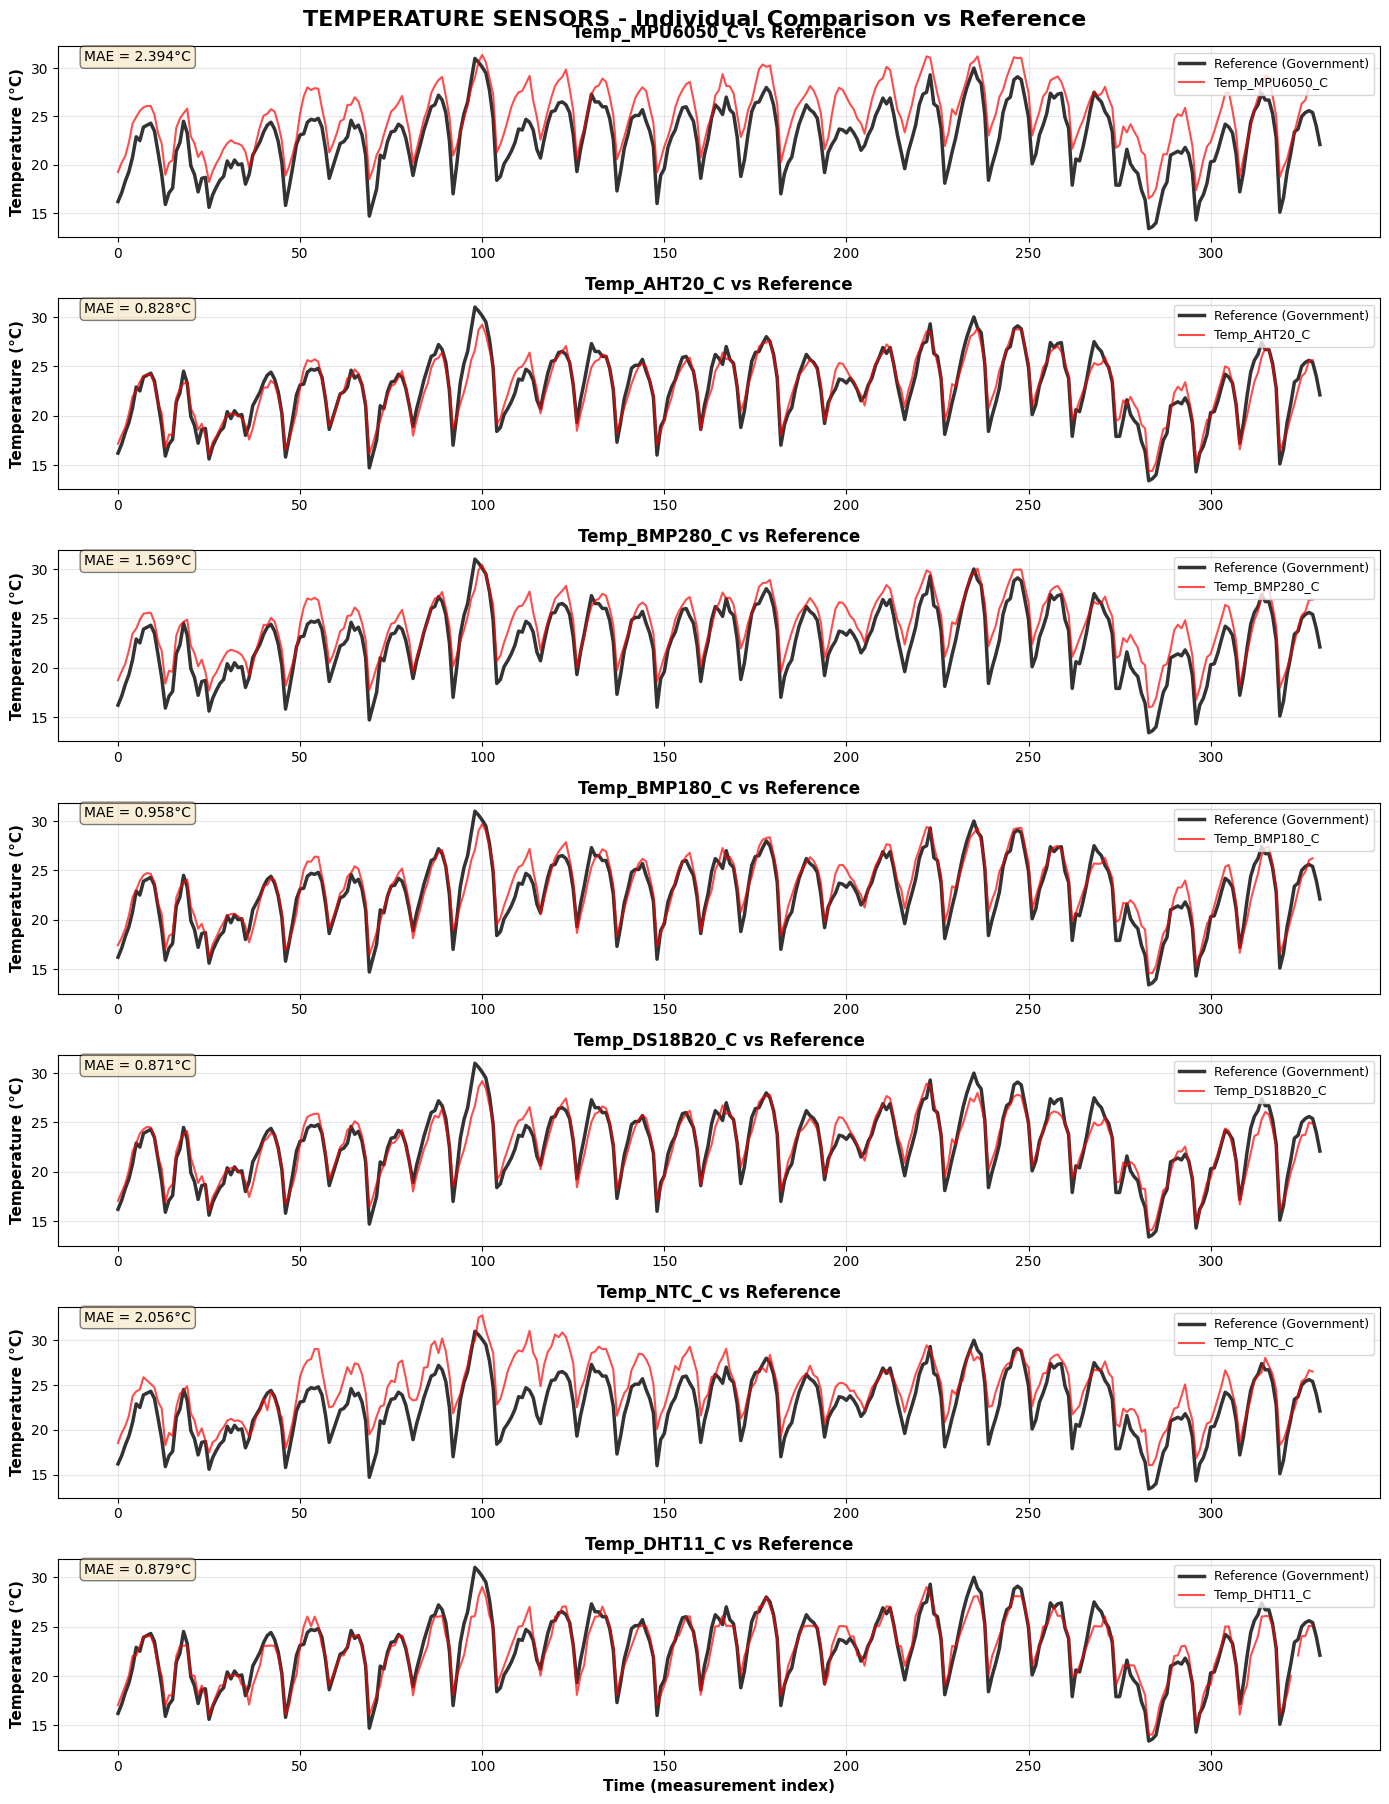

MAE SUMMARY - TEMPERATURE SENSORS
Temp_MPU6050_C      : MAE = 2.3938°C
Temp_AHT20_C        : MAE = 0.8284°C
Temp_BMP280_C       : MAE = 1.5688°C
Temp_BMP180_C       : MAE = 0.9576°C
Temp_DS18B20_C      : MAE = 0.8710°C
Temp_NTC_C          : MAE = 2.0560°C
Temp_DHT11_C        : MAE = 0.8787°C


In [112]:
import matplotlib.pyplot as plt
import numpy as np

# ============================================
# SEPARATE PLOTS: EACH TEMPERATURE SENSOR VS REFERENCE
# ============================================

# Define temperature sensors
temp_sensors = ['Temp_MPU6050_C', 'Temp_AHT20_C', 'Temp_BMP280_C',
                'Temp_BMP180_C', 'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C']

# Create time axis
time = np.arange(len(df_validation))

# Reference data
temp_reference = df_validation['Temp. Ins. (C)']

# Create figure with subplots (7 rows, 1 column)
fig, axes = plt.subplots(7, 1, figsize=(14, 18))

# Plot each sensor separately
for i, sensor in enumerate(temp_sensors):
    ax = axes[i]

    # Plot reference
    ax.plot(time, temp_reference, 'k-', linewidth=2.5,
            label='Reference (Government)', alpha=0.8)

    # Plot sensor (if exists)
    if sensor in df_validation.columns:
        ax.plot(time, df_validation[sensor], 'r-', linewidth=1.5,
                label=sensor, alpha=0.7)

        # Calculate and display MAE
        error = df_validation[sensor] - temp_reference
        mae = np.abs(error).mean()
        ax.text(0.02, 0.98, f'MAE = {mae:.3f}°C',
                transform=ax.transAxes, fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Formatting
    ax.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
    ax.set_title(f'{sensor} vs Reference', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)

    # Only show x-label on bottom plot
    if i == len(temp_sensors) - 1:
        ax.set_xlabel('Time (measurement index)', fontsize=11, fontweight='bold')

# ============================================
# FINAL ADJUSTMENTS
# ============================================

plt.tight_layout()
plt.suptitle('TEMPERATURE SENSORS - Individual Comparison vs Reference',
             fontsize=16, fontweight='bold', y=0.9995)
plt.show()

# ============================================
# PRINT MAE SUMMARY
# ============================================

print("=" * 60)
print("MAE SUMMARY - TEMPERATURE SENSORS")
print("=" * 60)

for sensor in temp_sensors:
    if sensor in df_validation.columns:
        error = df_validation[sensor] - temp_reference
        mae = np.abs(error).mean()
        print(f"{sensor:20s}: MAE = {mae:.4f}°C")
    else:
        print(f"{sensor:20s}: NOT FOUND")

print("=" * 60)